<a href="https://colab.research.google.com/github/LucasColas/Machine-Learning-Analysis-of-Diabetes/blob/main/Machine_Learning_Analysis_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Dataset

In [2]:
df = pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

In [ ]:
Xdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Visualization

(array([3., 0., 2., 1., 1., 0., 0., 0., 0., 1.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <a list of 10 Patch objects>)

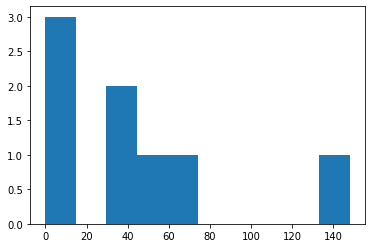

In [ ]:

plt.hist(X[0,:])

<BarContainer object of 2 artists>

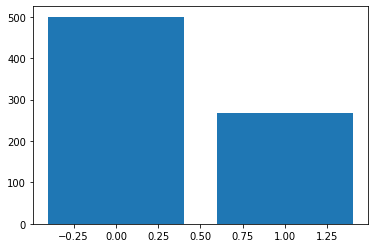

In [ ]:
pregnancies = np.array([(YR == 0).sum(), (YR == 1).sum()])
plt.bar(np.array([0,1]), pregnancies)


#### Visualization related to pregnancies

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

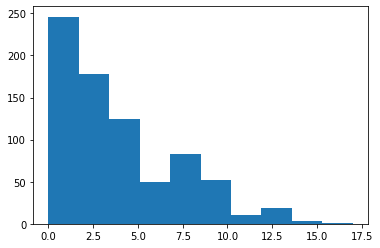

In [ ]:
plt.hist(X[:,0])

([<matplotlib.axis.XTick at 0x7f7203eea850>,
 [Text(0, 0, 'no'), Text(0, 0, 'yes')])

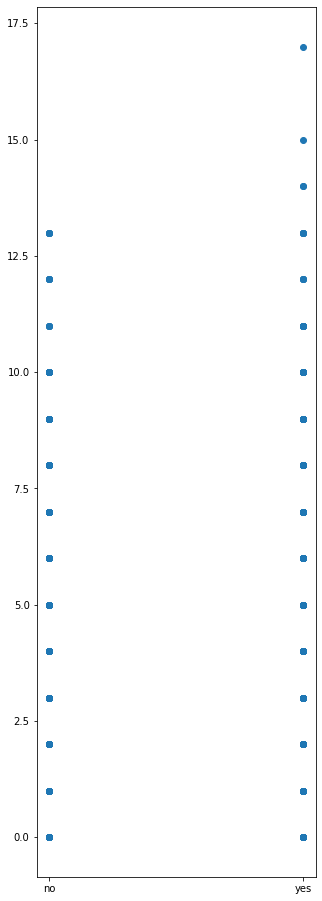

In [ ]:
plt.figure(figsize=(5,16))
plt.scatter(YR, X[:, 0])
x_ticks = [0, 1]

#specify x-axis labels
x_labels = ['no', 'yes'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

####Visualization related to Glucose

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

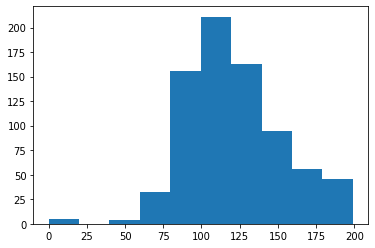

In [ ]:
plt.hist(X[:, 1])

In [ ]:
Glucose_no_d = X[np.where(YR==0), 1]
Glucose_d = X[np.where(YR==1), 1]

In [ ]:
Glucose_no_d = np.reshape(Glucose_no_d, (-1, 1))
Glucose_d = np.reshape(Glucose_d, (-1, 1))

(array([  3.,   0.,   4.,  28., 129., 167.,  99.,  49.,  12.,   9.]),
 array([  0. ,  19.7,  39.4,  59.1,  78.8,  98.5, 118.2, 137.9, 157.6,
        177.3, 197. ]),
 <a list of 10 Patch objects>)

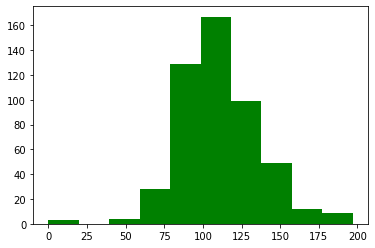

In [ ]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')


(array([ 2.,  0.,  0.,  1., 13., 54., 63., 51., 45., 39.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

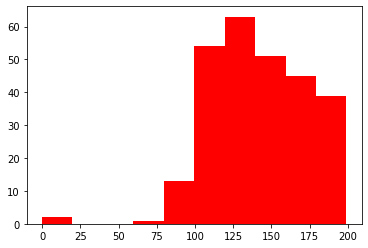

In [ ]:

plt.hist(Glucose_d[:, 0], color='red', label='with diabete')

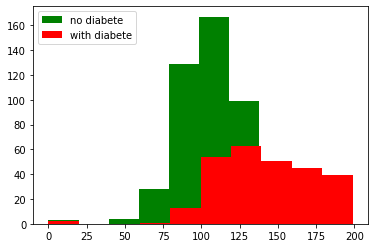

In [ ]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')
plt.hist(Glucose_d[:, 0], color='red', label='with diabete')
plt.legend(loc='upper left')
plt.show()


## Models

### Logistic Regression

In [5]:
X.shape[0]

768

In [7]:
test_size = 268/X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)

In [8]:
print("X train shape : ", X_train.shape)
print("Y train shape : ", y_train.shape)

print("X test shape : ", X_test.shape)
print("Y test shape : ", y_test.shape)

X train shape :  (500, 8)
Y train shape :  (500,)
X test shape :  (268, 8)
Y test shape :  (268,)


In [12]:
LR = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [26]:
LR.score(X_train, y_train)

0.75

In [27]:
LR.score(X_test, y_test)

0.8022388059701493

<Figure size 1800x1800 with 0 Axes>

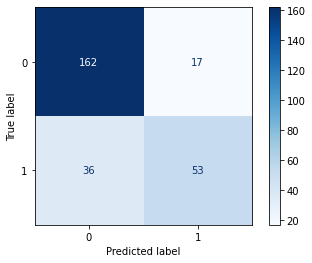

In [25]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        LR,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

#### cross validation

In [33]:
scores = cross_val_score(LR, X, YR, cv=20)

In [38]:
cv = np.arange(5, 30, 1)
for i in cv:
  scores = cross_val_score(LR, X, YR, cv=20)
  print(f"mean with cv={i} : {np.mean(scores)}")

mean with cv=5 : 0.7723009446693658
mean with cv=6 : 0.7723009446693658
mean with cv=7 : 0.7723009446693658
mean with cv=8 : 0.7723009446693658
mean with cv=9 : 0.7723009446693658
mean with cv=10 : 0.7723009446693658
mean with cv=11 : 0.7723009446693658
mean with cv=12 : 0.7723009446693658
mean with cv=13 : 0.7723009446693658
mean with cv=14 : 0.7723009446693658
mean with cv=15 : 0.7723009446693658
mean with cv=16 : 0.7723009446693658
mean with cv=17 : 0.7723009446693658
mean with cv=18 : 0.7723009446693658
mean with cv=19 : 0.7723009446693658
mean with cv=20 : 0.7723009446693658
mean with cv=21 : 0.7723009446693658
mean with cv=22 : 0.7723009446693658
mean with cv=23 : 0.7723009446693658
mean with cv=24 : 0.7723009446693658
mean with cv=25 : 0.7723009446693658
mean with cv=26 : 0.7723009446693658
mean with cv=27 : 0.7723009446693658
mean with cv=28 : 0.7723009446693658
mean with cv=29 : 0.7723009446693658


### QDA

### LDA

### SVM